# $k$-NN

The algorithm of the $k$ nearest neighbours is the most simple one of the supervised classification algorithm. It is **non-parametric** and does not require a learning phase. The principle of the algorithm is the following :

- We start from a learning set $D$ made of $n$ examples associated to a class : $(\mathbf{x}_i,c_i)^n_{i=0}$.
- Examples $\mathbf{x}_i$ belong to the space of Attributes: $\mathbb{X}$.
- An attribute is a dimension of $\mathbb{X}$.
- Classes $c_i$ belong to a set $C$.
- A new *unseen* example comes : $x_0$. We put this example is the space of Attributes :

![](img/Exercice1_01.png)

- We set the hyper-parameter $k = 3$. Using euclidean distance in $\mathbb{X}$, we can find the 3 nearest neighbours of $x_0$ :

![](img/Exercice1_02.png)

- Among the 3 neighbours, we select the majority class. We predict that $x_0$ belongs to the *red* class.
- $k$ is often selected as an odd number, to prevent *ex aequo* during majority vote.

## Procedure
1. load dataset **IRIS** :

In [2]:
from sklearn import datasets
data=datasets.load_iris()

2. Identify $n$ the amount of examples, $\sharp C$ the amount of classes, $d = \text{dim}(\mathbb{X})$ the number of attributes and their natures.

In [3]:
import numpy
targets = data['target']
samples_and_features = data['data']
class_amount = len(numpy.unique(targets))
print("examples quantity (n):\t{}".format(samples_and_features.shape[0]))
print("classes amount (#C):\t{}".format(class_amount))
print("number of attributes d:\t{} ({})".format(samples_and_features.shape[1], samples_and_features.dtype))

examples quantity (n):	150
classes amount (#C):	3
number of attributes d:	4 (float64)


3. We split the dataset into 2 subparts : $D_{app}$ (learning set) and $D_{test}$ (testing set). The learning set contains 50% of data and classes are distributed equally between the two sets.

In [4]:
D_test = {}
D_app = {}

tests_index = []
app_index = []
for i in range(150):
    if i < 25 or 49 < i < 75 or 99 < i < 125:
        tests_index.append(i)
    else:
        app_index.append(i)
    
for i in tests_index :
    if targets[i] not in D_test :
        D_test[targets[i]] = []
    else :
        D_test[targets[i]].append(samples_and_features[i])

for i in app_index :
    if targets[i] not in D_app :
        D_app[targets[i]] = []
    else :
        D_app[targets[i]].append(samples_and_features[i])

4. Defining a function **knn**, taking as inputs an example $\mathbf{x}$, learning set $D_{app}$ and hyper-parameter $k$. The output is the predicted class according to the $k$-NN alogithm.

In [5]:
import math
import sys

def euclidean_distance(p1 : numpy.ndarray, p2 : numpy.ndarray):
    """
        Return the euclidean distance between two points if they have 
        the same number of dimensions.
    """
    assert p1.shape == p2.shape, "can't compute euclidean distance on two points with different dimensions."
    result = 0
    for i in range(p1.size):
        result += (p1[i] - p2[i])**2
    return math.sqrt(result)

def compute_dataset_euclidean_distance(dataset : dict, x : numpy.array):
    """
        Compute the euclidean distance for each points in a dataset and
        a given point. The returned result is a list of tuples where each
        tuples (x,y,z) corresponds to k,v in the dataset with the distance z.
    """
    result = []
    for key, values in dataset.items():
        for v in values :
            distance = euclidean_distance(v, x)
            result.append((key, v, distance))
    return result

def knn(x, D_app, k):
    distances = compute_dataset_euclidean_distance(D_app,x)
    
    closest_neighbours_classes = []
    seen_neighbours = []
    for i in range(k):
        closest_neighbour = None
        min_distance = sys.float_info.max
        for d_i, d in enumerate(distances) :
            if d[2] < min_distance and d_i not in seen_neighbours :
                closest_neighbour = d_i
                min_distance = d[2]
        if closest_neighbour != None :
            seen_neighbours.append(closest_neighbour)
            closest_neighbours_classes.append(distances[closest_neighbour][0])

    predicted_class = numpy.argmax(numpy.bincount(numpy.array(closest_neighbours_classes)))
    return predicted_class

    
# how to use
#knn(numpy.array([6,6,6,6]), D_app,40)

5. Testing the function in a loop on every examples contained in $D_{test}$ and comparing *real class* and *predicted class*. We then deduct the good classification rate.

In [8]:
def compute_correct_classification_rate(D_app, D_test, k):
    guess_correct = 0
    total_guess = 0
    for key, value in D_test.items():
        for v in value :
            predicted_class = knn(v, D_app, k)
            if predicted_class == key :
                guess_correct += 1
            total_guess += 1
    return guess_correct/total_guess

print(compute_correct_classification_rate(D_app, D_test,3))

0.9583333333333334


6. We plot the classification rate depending on $k$ value (from 1 to 100 included) to find out the best value of $k$ to generalize.

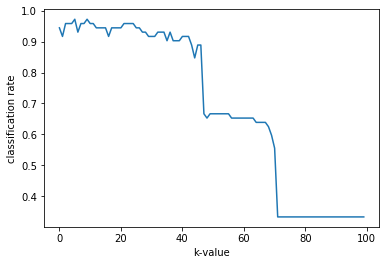

best k value to generalize : 5


In [9]:
import matplotlib.pyplot as plt

def plot_kvalues():
    ratios = []

    for k in range(1,101):
        ratios.append(compute_correct_classification_rate(D_app, D_test, k))

    plt.plot(ratios)
    plt.ylabel('classification rate')
    plt.xlabel('k-value')
    plt.show()
    
    print("best k value to generalize : {}".format(ratios.index(max(ratios))))
plot_kvalues()